In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat
%matplotlib inline

In [2]:
def find_closest_centroids(X, centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)
    
    for i in range(m):
        curr_dist=10000000
        for j in range(k):
            local_dist=np.sum(np.power((X[i,:]-centroids[j,:]),2))
            if local_dist<curr_dist:
                idx[i]=j
                curr_dist=local_dist
    return idx

In [3]:
data = loadmat('data/ex7data2.mat')
X = data['X']
initial_centroids = initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

idx = find_closest_centroids(X, initial_centroids)


In [4]:
def compute_centroids(X,idx,K):
    cent=np.zeros(shape=[K,X.shape[1]])
    for i in range(K):
        print(i)
        print(len(np.where(idx==i)[0]),np.sum(X[np.where(idx==i),:],axis=1))
        cent[i,:]=(np.sum(X[np.where(idx==i),:],axis=1))/len(np.where(idx==i)[0])
    return cent

In [5]:
compute_centroids(X, idx, 3)

0
191 [[ 463.80551241  603.16351773]]
1
103 [[ 598.79084078  271.26661449]]
2
6 [[ 42.71632123  21.70010639]]


array([[ 2.42830111,  3.15792418],
       [ 5.81350331,  2.63365645],
       [ 7.11938687,  3.6166844 ]])

In [6]:
def runKmeans(X,init_cent,max_iters):
    m,n=X.shape
    K=init_cent.shape[0]
    centroids=init_cent
    prev_cent=centroids
    idx=np.zeros(shape=[m,])
    for i in range(max_iters):
        idx=find_closest_centroids(X,centroids)
        centroids=compute_centroids(X,idx,K)
    return idx,centroids

In [7]:
idx, centroids = runKmeans(X, initial_centroids, 10)

0
191 [[ 463.80551241  603.16351773]]
1
103 [[ 598.79084078  271.26661449]]
2
6 [[ 42.71632123  21.70010639]]
0
179 [[ 414.07269123  577.8668048 ]]
1
91 [[ 485.27912911  221.2752353 ]]
2
30 [[ 205.96085408   96.98819852]]
0
164 [[ 360.29566556  561.10419936]]
1
88 [[ 425.52874968  187.41953543]]
2
48 [[ 319.48825918  147.60650383]]
0
131 [[ 259.69593439  527.28528345]]
1
93 [[ 363.77020997  136.76630756]]
2
76 [[ 481.84653006  232.0786476 ]]
0
98 [[ 191.49147716  492.50586582]]
1
108 [[ 337.67684257  120.11448989]]
2
94 [[ 576.14435469  283.5098829 ]]
0
98 [[ 191.49147716  492.50586582]]
1
102 [[ 310.45446166  103.57186161]]
2
100 [[ 603.3667356   300.05251118]]
0
98 [[ 191.49147716  492.50586582]]
1
102 [[ 310.45446166  103.57186161]]
2
100 [[ 603.3667356   300.05251118]]
0
98 [[ 191.49147716  492.50586582]]
1
102 [[ 310.45446166  103.57186161]]
2
100 [[ 603.3667356   300.05251118]]
0
98 [[ 191.49147716  492.50586582]]
1
102 [[ 310.45446166  103.57186161]]
2
100 [[ 603.3667356   300.0

(300, 2)


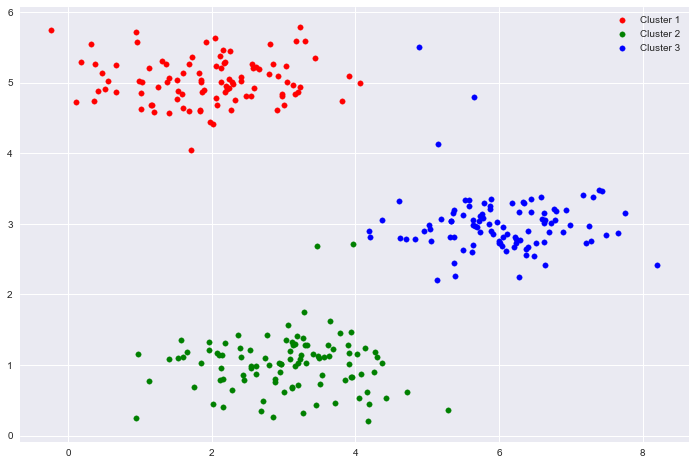

In [8]:
cluster1 = X[np.where(idx == 0)[0],:]
cluster2 = X[np.where(idx == 1)[0],:]
cluster3 = X[np.where(idx == 2)[0],:]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.legend()
print(X.shape)

In [9]:
def init_cent(X,K):
    randidx=np.zeros(shape=X.shape)
    randidx[:,0]=np.random.permutation(X[:,0])
    randidx[:,1]=np.random.permutation(X[:,1])
    centroids=randidx[:K,:]
    return centroids

In [10]:
init_cent(X,5)

array([[ 4.70775773,  3.05676866],
       [ 2.45575934,  0.88027602],
       [ 5.31712478,  2.44954813],
       [ 0.37963437,  5.09464676],
       [ 1.97619886,  5.36028437]])

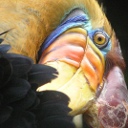

In [11]:
from IPython.display import Image
Image(filename='data/bird_small.png')

In [12]:
image_data = loadmat('data/bird_small.mat')


In [13]:
A = image_data['A']
A.shape

(128, 128, 3)

In [14]:
A=A/255
X=np.reshape(A,(A.shape[0]*A.shape[1],A.shape[2]))
X.shape

(16384, 3)

In [15]:
initial_centroids=init_cent(X,16)
idx, centroids = runKmeans(X, initial_centroids, 10)
idx=find_closest_centroids(X, centroids)
X_rec=centroids[idx.astype(int),:]
X_rec.shape

0
689 [[ 364.30588235  250.9372549   173.17647059]]
1
1723 [[ 1354.8         1179.55686275   869.47058824]]
2
2282 [[ 2102.50196078  1782.          1324.34901961]]
3
0 [[ 0.  0.  0.]]
4
1076 [[ 489.67058824  479.07843137  458.39607843]]
5
77 [[ 53.98823529  66.49019608  67.94117647]]
6
0 [[ 0.  0.  0.]]
7
153 [[  82.          102.96862745  119.98431373]]
8
5611 [[ 754.21568627  771.50588235  733.41568627]]
9
192 [[ 63.30196078  67.65882353  78.15294118]]
10
122 [[ 116.04313725   61.80784314   30.69803922]]
11
0 [[ 0.  0.  0.]]
12
1175 [[ 1147.8         1124.76862745   907.25490196]]
13
415 [[ 165.68627451  108.65882353   85.10196078]]
14
0 [[ 0.  0.  0.]]
15
2869 [[ 2002.30196078  1545.21568627  1018.59215686]]


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


0
1096 [[ 597.8         439.66666667  248.53333333]]
1
2201 [[ 1749.63137255  1491.56078431  1069.58823529]]
2
1414 [[ 1307.95686275  1114.58039216   836.80784314]]
3
0 [[ 0.  0.  0.]]
4
821 [[ 416.36078431  380.9254902   369.67058824]]
5
293 [[ 223.21568627  240.92941176  251.43137255]]
6
0 [[ 0.  0.  0.]]
7
356 [[ 187.74901961  220.95686275  271.74117647]]
8
4934 [[ 566.68235294  593.0627451   549.57254902]]
9
523 [[ 163.71764706  174.10980392  209.10980392]]
10
557 [[ 509.45098039  321.87058824  145.74901961]]
11
0 [[ 0.  0.  0.]]
12
1421 [[ 1391.30980392  1326.69411765  1111.61176471]]
13
1023 [[ 357.27058824  275.20784314  216.10980392]]
14
0 [[ 0.  0.  0.]]
15
1745 [[ 1225.47058824   961.08235294   586.60784314]]
0
1153 [[ 638.          469.15294118  249.92941176]]
1
2173 [[ 1738.00392157  1477.81568627  1046.6627451 ]]
2
1227 [[ 1145.89019608   982.51372549   719.10196078]]
3
0 [[ 0.  0.  0.]]
4
1056 [[ 570.07843137  500.3254902   479.74509804]]
5
490 [[ 386.04705882  386.301960

(16384, 3)

In [16]:
X_rec=np.reshape(X_rec,(A.shape[0],A.shape[1],A.shape[2]))
X_rec.shape

(128, 128, 3)

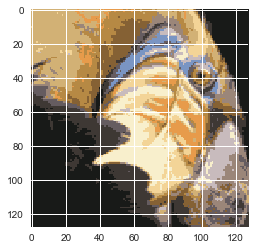

In [17]:
plt.imshow(X_rec)

In [18]:
data = loadmat('data/ex7data1.mat')
data

{'X': array([[ 3.38156267,  3.38911268],
        [ 4.52787538,  5.8541781 ],
        [ 2.65568187,  4.41199472],
        [ 2.76523467,  3.71541365],
        [ 2.84656011,  4.17550645],
        [ 3.89067196,  6.48838087],
        [ 3.47580524,  3.63284876],
        [ 5.91129845,  6.68076853],
        [ 3.92889397,  5.09844661],
        [ 4.56183537,  5.62329929],
        [ 4.57407171,  5.39765069],
        [ 4.37173356,  5.46116549],
        [ 4.19169388,  4.95469359],
        [ 5.24408518,  4.66148767],
        [ 2.8358402 ,  3.76801716],
        [ 5.63526969,  6.31211438],
        [ 4.68632968,  5.6652411 ],
        [ 2.85051337,  4.62645627],
        [ 5.1101573 ,  7.36319662],
        [ 5.18256377,  4.64650909],
        [ 5.70732809,  6.68103995],
        [ 3.57968458,  4.80278074],
        [ 5.63937773,  6.12043594],
        [ 4.26346851,  4.68942896],
        [ 2.53651693,  3.88449078],
        [ 3.22382902,  4.94255585],
        [ 4.92948801,  5.95501971],
        [ 5.79295774,  

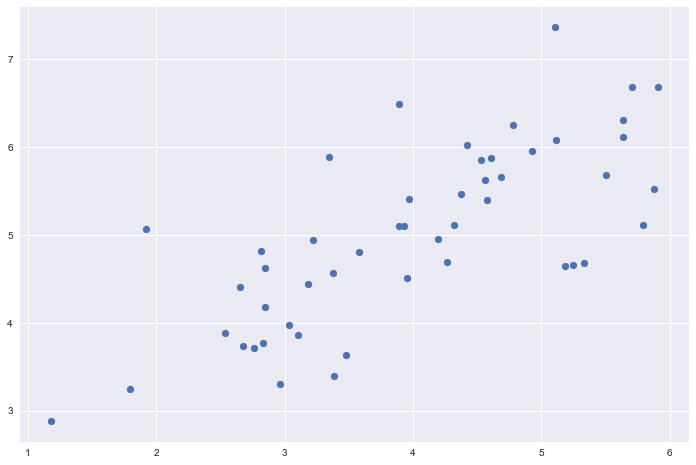

In [19]:
X = data['X']

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:, 0], X[:, 1])

In [20]:
def pca(X):
    X=(X-np.mean(X))/np.std(X)
    X=np.matrix(X)
    m=X.shape[0]
    cov_m=(X.T*X)/m
    U,S,V=np.linalg.svd(cov_m)
    return U, S, V

In [21]:
U,S,V=pca(X)
U.shape,S.shape,V.shape

((2, 2), (2,), (2, 2))

In [22]:
def project_data(X,U,K):
    Z=np.dot(X,U[:,:K])
    return Z

In [23]:
Z = project_data(X, U, 1)
Z.shape

(50, 1)

In [24]:
def recover_data(Z,U,K):
    X_rec=np.dot(Z,U[:,:K].T)
    return X_rec

In [25]:
X_rec = recover_data(Z, U, 1)
X_rec.shape

(50, 2)

(50, 2)


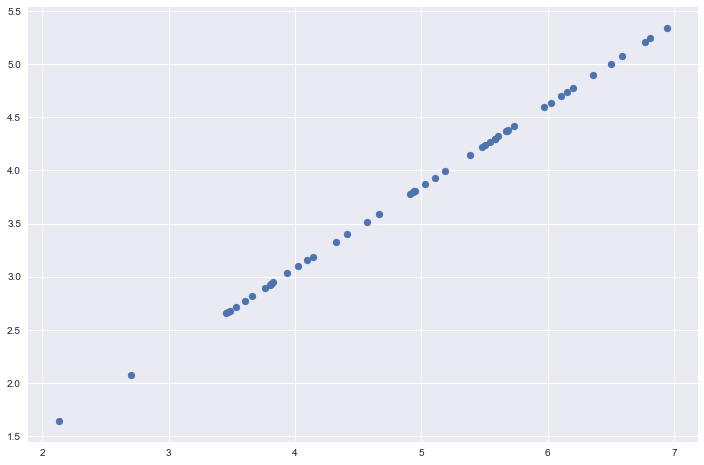

In [33]:
fig, ax = plt.subplots(figsize=(12,8))
print(X_rec.shape)
ax.scatter([X_rec[:, 0]], [X_rec[:, 1]])

In [36]:
faces = loadmat('data/ex7faces.mat')
X = faces['X']
X.shape

(5000, 1024)

In [38]:
U, S, V = pca(X)
Z = project_data(X, U, 100)

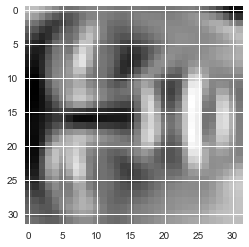

In [39]:
X_recovered = recover_data(Z, U, 100)
face = np.reshape(X_recovered[3,:], (32, 32))
plt.imshow(face)